# LOGISTIC REGRESSION PROBLEM WITH FEATURE EXTRACTION /SELECTION METHODS

### DATASET: ENERGY PREDICTION DATASET 
### link: https://www.kaggle.com/loveall/appliances-energy-prediction


#### GOAL : SELECTING THE BEST FEATURES FROM AN APLIANCES ENERGY DATASET GOTTEN FROM ASENSOR TO PREDICT THE EFFECT OF THE FEATURES ON THE APPLIANCE



## 1. load and view data


In [9]:
import pandas as pd
import numpy as np
df= pd.read_csv("KAG_energydata_complete.csv")

df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [10]:
#total amount of rows and colunms

total_rows=len(df.axes[0])

print("total rows", total_rows )


total_cols=len(df.axes[1])

print("total columns", total_cols )

total rows 19735
total columns 29


In [11]:
import matplotlib.pyplot as plt

df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [12]:
#important columns : Pressure, air temperature and wind speed 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [13]:
#drop the date object

df2=df.drop(['date'], axis=1)

df2.head(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## 2. Visualize some correlations

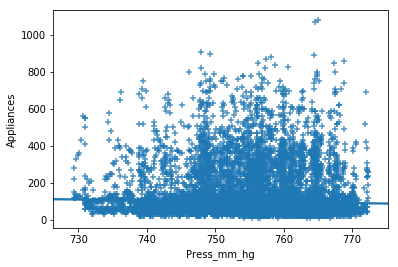

In [15]:
#information from dataset

#Pressure, air temperature and wind speed are important parameters in the prediction.

#Data from a WSN that measures temperature and humidity increase the pred. accuracy.

#From the WSN, the kitchen, laundry and living room data ranked high in importance.

import seaborn as sns

ax = sns.regplot(x=df2['Press_mm_hg'], y=df2['Appliances'],marker="+")



## 3 TRAINING WITHOUT FEATURE SELECTION

In [26]:
#Features
#drop columns not needed for training
df3= df2.drop(["Visibility","Tdewpoint","rv1","rv2","lights","Appliances"], axis = 1 )

X=df3
df3.head(5)
#Label
y=df['Appliances']

from keras.utils import to_categorical



y = to_categorical(y)

print(y.shape)


print(X.shape)

(19735, 1081)
(19735, 22)


In [28]:
#using a keras neural network

from sklearn import preprocessing, neighbors,model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2) 

#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural network
model = Sequential()
model.add(Dense(16, input_dim=22, activation='relu'))
model.add(Dense(12, activation='relu'))

#output layer
model.add(Dense(1081, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
15788/15788 [==============================] - 5s 306us/step - loss: 11.7511 - acc: 0.2107
Epoch 2/50
15788/15788 [==============================] - 2s 140us/step - loss: 11.6915 - acc: 0.2226
Epoch 3/50
15788/15788 [==============================] - 2s 112us/step - loss: 11.6908 - acc: 0.2228
Epoch 4/50
15788/15788 [==============================] - 2s 116us/step - loss: 11.6857 - acc: 0.2245
Epoch 5/50
15788/15788 [==============================] - 2s 98us/step - loss: 11.6891 - acc: 0.2209
Epoch 6/50
15788/15788 [==============================] - 1s 78us/step - loss: 11.6804 - acc: 0.2228
Epoch 7/50
15788/15788 [==============================] - 1s 82us/step - loss: 11.6775 - acc: 0.2242
Epoch 8/50
15788/15788 [==============================] - 2s 99us/step - loss: 11.6767 - acc: 0.2241
Epoch 9/50
15788/15788 [==============================] - 2s 106us/step - loss: 11.6757 - acc: 0.2243
Epoch 10/50
15788/15788 [==============================] - ETA: 0s - loss: 11.6779 - a

In [32]:
#CHOOSE A LOGISTIC REGRESSION ALGORITHM
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

clasifier2 =   KNeighborsClassifier()

#label
y= df['Appliances']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2) 


#use algorithm to train
print(clasifier2.fit(X_train,y_train))

#test algorithm on test and train data
accuracy = clasifier2.score(X_train, y_train)
print("Original accuracy KNeighborsClassifier on train data",accuracy )



#test algorithm on test and train data
accuracy = clasifier2.score(X_test, y_test)
print("Original accuracy KNeighborsClassifier on test data",accuracy )



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Original accuracy KNeighborsClassifier on train data 0.5050038003546997
Original accuracy KNeighborsClassifier on test data 0.2956675956422599


In [20]:
clasifier3 =LogisticRegression(C=1000)
#label
y= df['Appliances']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2) 


#use algorithm to train
print(clasifier3.fit(X_train,y_train))

#test algorithm on test and train data
accuracy = clasifier3.score(X_train, y_train)
print("Original accuracyLogistic regression on train data",accuracy )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Original accuracyLogistic regression on train data 0.2556371928046618


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# 4 APPLYING FEATURE SELECTION ALGORITHMS TO DATASET

#### 1. RFE Recursive Feature Elimination

In [21]:
#Feature Extraction



# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data

dataframe = df2

array = dataframe.values
X = df3
Y = array[:,0]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 200)
fit = rfe.fit(X, Y)
feature = fit.transform(X)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Num Features: 22
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


#### THIS METHOD SELECTED 22 FEATURES

#### 2. Univariate Statistical Tests

In [23]:


# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
dataframe = df2

array = dataframe.values
X = df3
Y = array[:,0]
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=10)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:9,:])

fit.get_support()

[26.8947909349  4.1369401122 23.1691289081  5.6325533083 22.2071057518
  6.5055289414 23.7475981319  2.6361285273 21.9717122518  2.6657195392
 17.9997741398 21.0106984987 20.9868200357  5.5908402854 32.8120069414
 13.748378993  21.3114434443 11.2028382497 15.9728127746  3.6814389732
 20.6555052691  5.0933481571]
[[19.89         19.2          19.           18.2         ]
 [19.89         19.2          19.           18.2         ]
 [19.89         19.2          18.9266666667 18.2         ]
 [19.89         19.2          18.89         18.1         ]
 [19.89         19.2          18.89         18.1         ]
 [19.89         19.2          18.89         18.1         ]
 [19.89         19.2          18.89         18.1         ]
 [19.8566666667 19.2          18.89         18.1         ]
 [19.79         19.2          18.89         18.1         ]]


array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False])

##### THIS METHOD SELECTED FOUR FEATURES

#### 3. PCA PRINPLE COMPONENT ANALYSIS

In [24]:

# Feature Extraction with PCA

from sklearn.decomposition import PCA
X = df3
# feature extraction
pca = PCA(n_components=3)
fitt = pca.fit(X)

featuress = fitt.transform(X)
# summarize components
print("Explained Variance: %s" % fitt.explained_variance_ratio_)
print(fitt.components_)

Explained Variance: [0.7485855383 0.0881208227 0.0643881553]
[[ 0.0279359093 -0.0319772494  0.0377735117 -0.053582253   0.0358423865
  -0.0499211751  0.0405884234 -0.0524293629  0.0321023011 -0.0750828401
   0.1211343752 -0.9038588467  0.0449493287 -0.0581645189  0.0362654554
  -0.0799885546  0.0412259253 -0.0504597558  0.1016030397  0.0168881219
  -0.3455898133 -0.0045131924]
 [ 0.0644280671  0.2759746992  0.0939290174  0.2282875726  0.0923949586
   0.1859738078  0.0681328489  0.2940210228  0.0817435417  0.3443616172
   0.2905953669 -0.1375902528  0.0583406625  0.355300323   0.045947046
   0.3211926213  0.0733809012  0.2557327421  0.2637064672 -0.2753362348
   0.2084171145  0.0374338593]
 [-0.0152886051  0.039051064   0.0456650785 -0.1001021555 -0.0437814086
   0.0860638659 -0.0327250947  0.0812190697 -0.0376286807  0.261775476
   0.1236365669  0.3142189741 -0.0453856884  0.0435545562 -0.0551442247
   0.030817435  -0.0613000862  0.0495745571  0.1319233877 -0.0278366364
  -0.8609998794

#### THIS METHOD REDUCES AND COMPRESSES THE FEATURES

# 4 TRAINING WITH A FEATURE SELECTION ALGORITHM 

#### (i) RFE Recursive Feature Elimination selection

In [36]:
#CHOOSE A KNeighborsClassifier ALGORITHM

from sklearn.neighbors import KNeighborsClassifier



clasifier2 =   KNeighborsClassifier( leaf_size=100)
clasifier3 =LogisticRegression(C=1000)

#using the  RFE Recursive Feature Elimination selection
df4= feature
Xx=df4

Yy=df2['Appliances']

X_train, X_test, y_train, y_test = model_selection.train_test_split(Xx, Yy, test_size=0.2) 


#use algorithm to train
print(clasifier2.fit(X_train,y_train))

#test algorithm on test and train data
accuracy = clasifier2.score(X_train, y_train)
print("Original accuracy KNeighborsClassifier on train data",accuracy )



#test algorithm on test and train data
accuracy = clasifier2.score(X_test, y_test)
print("Original accuracy KNeighborsClassifier on test data",accuracy )



KNeighborsClassifier(algorithm='auto', leaf_size=100, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Original accuracy KNeighborsClassifier on train data 0.5040537116797568
Original accuracy KNeighborsClassifier on test data 0.29693438054218396


#### the  RFE Recursive Feature Elimination is slighly higher than training without feature extraction

#### (ii) Univariate Statistical Tests

In [37]:
#CHOOSE A KNeighborsClassifier ALGORITHM

from sklearn.neighbors import KNeighborsClassifier



clasifier2 =   KNeighborsClassifier( leaf_size=100)
clasifier3 =LogisticRegression(C=1000)

#using the Univariate Statistical Tests  selection
df4= features
Xx=df4

Yy=df2['Appliances']

X_train, X_test, y_train, y_test = model_selection.train_test_split(Xx, Yy, test_size=0.2) 


#use algorithm to train
print(clasifier2.fit(X_train,y_train))

#test algorithm on test and train data
accuracy = clasifier2.score(X_train, y_train)
print("Original accuracy KNeighborsClassifier on train data",accuracy )



#test algorithm on test and train data
accuracy = clasifier2.score(X_test, y_test)
print("Original accuracy KNeighborsClassifier on test data",accuracy )



KNeighborsClassifier(algorithm='auto', leaf_size=100, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Original accuracy KNeighborsClassifier on train data 0.4953128958702812
Original accuracy KNeighborsClassifier on test data 0.2852799594628832


#### (iii) PCA PRINPLE COMPONENT ANALYSIS

In [38]:
#CHOOSE A KNeighborsClassifier ALGORITHM

from sklearn.neighbors import KNeighborsClassifier



clasifier2 =   KNeighborsClassifier( leaf_size=100)
clasifier3 =LogisticRegression(C=1000)

#using the PCA PRINPLE COMPONENT ANALYSISl Tests  selection
df4= featuress
Xx=df4

Yy=df2['Appliances']

X_train, X_test, y_train, y_test = model_selection.train_test_split(Xx, Yy, test_size=0.2) 


#use algorithm to train
print(clasifier2.fit(X_train,y_train))

#test algorithm on test and train data
accuracy = clasifier2.score(X_train, y_train)
print("Original accuracy KNeighborsClassifier on train data",accuracy )



#test algorithm on test and train data
accuracy = clasifier2.score(X_test, y_test)
print("Original accuracy KNeighborsClassifier on test data",accuracy )



KNeighborsClassifier(algorithm='auto', leaf_size=100, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Original accuracy KNeighborsClassifier on train data 0.46383329110717
Original accuracy KNeighborsClassifier on test data 0.2495566252850266
